In [141]:
import heapq

def repetitive_task():
    print("Repetitive Task executed")

def repetitive_task2():
    print("Repetitive Task 2 executed")

task_queue = []
def push(task_queue,task):
    heapq.heappush(task_queue, (1, 4, task))

push(task_queue,repetitive_task)
push(task_queue,repetitive_task2)

task_queue

TypeError: '<' not supported between instances of 'function' and 'function'

In [371]:
import heapq
import time

class PersonScheduler:
    def __init__(self, owner):
        self.task_queue = []  # Priority queue to manage tasks
        self.hold_next_action = 0  # Time to wait before executing next task
        self.hold_current_action = 0 # Time to wait before executing current task
        self.do_finish_task = False  # Flag to finish current task
        self.owner = owner
        self.dummy_counter = 0
        
    def add_scheduled_task(self, freq=0, execute_in=0, **task_kwargs):
        start_time = self.owner.steps + execute_in # Calculate the first scheduled time
        heapq.heappush(self.task_queue, (start_time, self.dummy_counter, freq, task_kwargs))  # Add the task with its frequency
        self.dummy_counter += 1

    def execute_schedule(self, current_time):
        """Execute next task if it's time to do so and there is no previous task in progress."""
        if self.do_finish_task: 
            self.owner.terminate_task()
            self.do_finish_task = False

        if self.hold_next_action or self.hold_current_action: # if there is a task in progress
            self.owner.execute_task()
            return None
        
        try: # if there is a task in the queue
            next_time, _, freq, task_kwargs = self.task_queue[0]
        except IndexError:
            return None

        if current_time >= next_time:
            self.owner.prepare_task(**task_kwargs)
            if not self.hold_current_action: # if task can start immediately
                heapq.heappop(self.task_queue)
                if freq > 0:
                    self.add_scheduled_task(freq=freq, execute_in=freq + next_time - current_time, **task_kwargs)
            self.owner.execute_task() # execute task
    
            

class Owner:
    def __init__(self):
        self.steps = 0
        self.loc = 0
        self.scheduler=PersonScheduler(self)
        self.set_idle()

    def set_idle(self):
        self.state='idle'
        self.path=[]

    def step(self):
        print('time', self.steps)
        self.scheduler.execute_schedule(self.steps)
        print('scheduler', self.scheduler.task_queue)
        print('   owner state', self.state, '\n')
        self.steps += 1

    def prepare_task(self, **kwargs):
        '''either hold the current task while walking or hold the next task while executing current'''
        route = kwargs['route'] if 'route' in kwargs else []
        if not route or self.compare_placement(route[-1]):
            print('prepare to execute')
            self.state=kwargs['action'] #self.model.action_state[kwargs['action']]
            self.scheduler.hold_next_action = kwargs['duration'] if 'duration' in kwargs else 0
            if route: self.do_interactions(with_=route[-1], mode="initiate")
        else:
            print('prepare to walk')
            self.find_path(route)
            self.state='walking'
            self.scheduler.hold_current_action = 1 # hold current task while walking

    def execute_task(self):
        if self.state=='walking':
            print('walking')
            self.loc=self.path.pop(0)
            print('loc:', self.loc, 'path:', self.path)
            if len(self.path)==0: 
                self.scheduler.do_finish_task=True
        elif self.state=='remove': 
            self.scheduler.do_finish_task=True
        else:
            print('executing task')
            self.scheduler.hold_next_action -= 1
            if self.scheduler.hold_next_action == 0: 
                self.scheduler.do_finish_task=True                  

    def terminate_task(self):
        if self.state=='walking':
            print("arrived at destination")
            print('loc:', self.loc, 'path:', self.path)
            self.scheduler.hold_current_action=0
            self.set_idle()
        elif self.state=='remove': #leaving
            print('removing')
            self.set_idle()
            self.scheduler.task_queue=[]
        else:
            print('finished task')
            self.do_interactions(mode="terminate")
            self.set_idle()

    def find_path(self, places):
        self.path=places.copy()
    
    def compare_placement(self, place):
        return self.loc==place
    
    def do_interactions(self, with_=None, mode=None):
        if mode=="initiate":
            print('initiating interaction')
        elif mode=="terminate":
            print('terminating interaction')

    
    


owner = Owner()
owner.scheduler.add_scheduled_task(action='remove', execute_in=20)
owner.scheduler.add_scheduled_task(action='do-document', route=[1], duration=2)
owner.scheduler.add_scheduled_task(execute_in=7, freq=3, action='do-document', route=[1,2], duration=1)
owner.scheduler.add_scheduled_task(execute_in=9, action='do-document', route=[1], duration=2)

for i in range(25):
    owner.step()

time 0
prepare to walk
walking
loc: 1 path: []
scheduler [(0, 1, 0, {'action': 'do-document', 'route': [1], 'duration': 2}), (9, 3, 0, {'action': 'do-document', 'route': [1], 'duration': 2}), (7, 2, 3, {'action': 'do-document', 'route': [1, 2], 'duration': 1}), (20, 0, 0, {'action': 'remove'})]
   owner state walking 

time 1
arrived at destination
loc: 1 path: []
prepare to execute
initiating interaction
executing task
scheduler [(7, 2, 3, {'action': 'do-document', 'route': [1, 2], 'duration': 1}), (9, 3, 0, {'action': 'do-document', 'route': [1], 'duration': 2}), (20, 0, 0, {'action': 'remove'})]
   owner state do-document 

time 2
executing task
scheduler [(7, 2, 3, {'action': 'do-document', 'route': [1, 2], 'duration': 1}), (9, 3, 0, {'action': 'do-document', 'route': [1], 'duration': 2}), (20, 0, 0, {'action': 'remove'})]
   owner state do-document 

time 3
finished task
terminating interaction
scheduler [(7, 2, 3, {'action': 'do-document', 'route': [1, 2], 'duration': 1}), (9, 3,

In [363]:
owner = Owner()
owner.scheduler.add_scheduled_task(action='remove', execute_in=20)
owner.scheduler.add_scheduled_task(action='do-document', route=[1], duration=2)
owner.scheduler.add_scheduled_task(execute_in=7, freq=3, action='do-document', route=[1,2], duration=1)
owner.scheduler.add_scheduled_task(execute_in=9, action='do-document', route=[1], duration=2)


In [372]:
'waiting' in 'waiting-action'

True

In [374]:
a={'abstract': 'do-document', 'route': [1], 'duration': 2, 'action': 'do-document'}
list(a.values())

['do-document', [1], 2, 'do-document']

In [364]:
owner2 = Owner()
owner2.scheduler.add_scheduled_task(action='remove', execute_in=30)

In [365]:
owner2.scheduler.task_queue.extend(owner.scheduler.task_queue)

In [367]:
owner2.scheduler.task_queue

[(30, 0, 0, {'action': 'remove'}),
 (0, 1, 0, {'action': 'do-document', 'route': [1], 'duration': 2}),
 (9, 3, 0, {'action': 'do-document', 'route': [1], 'duration': 2}),
 (7, 2, 3, {'action': 'do-document', 'route': [1, 2], 'duration': 1}),
 (20, 0, 0, {'action': 'remove'})]

In [350]:
route=[1,2]
owner.find_path(route)

In [351]:
owner.path.pop(0)

1

In [352]:
owner.path

[2]

In [165]:
owner = Owner()
next_time, _, interval, task, task_kwargs = owner.scheduler.task_queue[0]

In [170]:
def remove(**kwargs):
    print("Remove executed")

In [175]:
remove(**{'a':3})

Remove executed


In [169]:
task(9)

TypeError: remove() takes 1 positional argument but 2 were given

In [163]:
task(task_kwargs)

TypeError: remove() takes 1 positional argument but 2 were given

In [115]:
current_time = 15 #time.time()
scheduler.execute_tasks(current_time)

Repetitive Task executed
Repetitive Task executed
Repetitive Task executed


In [9]:
def f(a=3):
    for i in range(a):
        yield i
        if i==8: return

In [12]:
for x in filter(lambda x: x%2==0, f(10)):
    print(x)

0
2
4
6
8


In [6]:
x[1]=3
x

{1: 3, 2: 0, 3: 0}

In [8]:
sorted([1,2,3,0],reverse=True)

[3, 2, 1, 0]

In [6]:
len((x for x in range(3)))

TypeError: object of type 'generator' has no len()

In [16]:
a=0
if []:
    print(a)

In [375]:
import mesa
import mesa_geo as mg
from shapely.geometry import Point, LineString
import geopandas as gpd
import matplotlib.pyplot as plt
from os.path import join
import pandas as pd

class State(mg.GeoAgent):
    def __init__(self, unique_id, model, geometry, crs):
        super().__init__(unique_id, model, geometry, crs)
        if self.unique_id == 'path': self.atype = 'path'

class GeoModel(mesa.Model):
    def __init__(self):
        self.space = mg.GeoSpace(warn_crs_conversion=False)

        file_path=join ('..','data','floorplans','unisabana_hospital_%s.geojson')
        file_names=['floor','polygons']
        df_space = pd.concat((gpd.read_file(file_path%file) for file in file_names),ignore_index=True)
        space_agents = mg.AgentCreator(agent_class=State, model=self).from_GeoDataFrame(df_space)  
        self.space.add_agents(space_agents)
        self.walk=[]
        for agent in self.space.agents:
            if agent.atype != 'floor' and agent.atype!='room':
                self.walk.append(agent)

    def compare_path_bounds(self, path_bounds, start, end) -> bool:
        path_a, path_b = path_bounds
        return path_a.within(start.buffer(0.2)) and path_b.within(end.buffer(0.2))

In [376]:
m = GeoModel()
floor = [i for i in m.space.agents if i.atype == "floor"][0]
source = m.space.agents[20]#.geometry.centroid
target = m.space.agents[20]#.geometry.centroid

In [22]:
source.atype

'bed'

In [377]:
medic_room = [i for i in m.space.agents if i.atype == "medication_station"][0]
nurse_station = [i for i in m.space.agents if i.atype == "nurse_station"][0]

In [378]:
medic_room

27


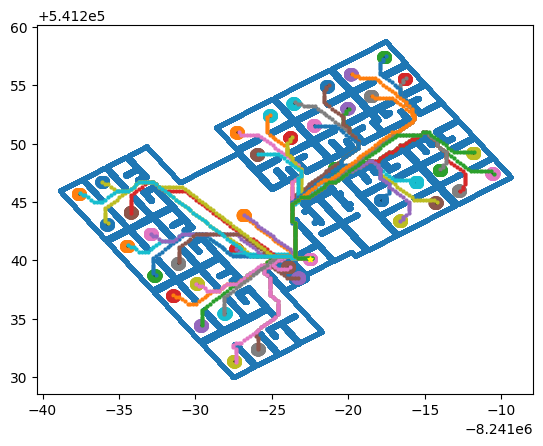

In [393]:
import numpy as np
ox,oy=np.array(floor.geometry.boundary.segmentize(max_segment_length=0.001).coords.xy)
plt.scatter(ox,oy,marker='.',linewidths=0.005)


for space in m.walk:
    s=space.geometry.centroid
    s_near=s.buffer(0.2)
    plt.scatter(*s_near.exterior.xy,marker='o',linewidths=0.05)
    plt.scatter([s.x],[s.y],marker='.',color='black',s=1)


llegadas=[]
some_space=medic_room.geometry.centroid
for path_bounds, path in cache_paths.items():
    if path_bounds[0].within(some_space.buffer(0.2)):
        plt.scatter([x for x,_ in path],[y for _,y in path],marker='.',linewidths=0.05)
        llegadas.append(path_bounds[1])
plt.scatter([some_space.x],[some_space.y],marker='*',color='yellow',s=15)

print(i)
i+=1

In [ ]:
ox,oy=np.array(floor.geometry.boundary.segmentize(max_segment_length=0.001).coords.xy)
plt.scatter(ox,oy,marker='.',linewidths=0.005)


for x in llegadas:
    for y in llegadas:
        if x!=y:
            if x.within(y.buffer(0.2)):
                plt.scatter([x.x],[x.y],marker='*',color='red',s=5)
                plt.scatter([y.x],[y.y],marker='*',color='green',s=5)
                print(x,y)

In [389]:
import pickle

def get_path (from_agent, to_agent, cache_paths,dstarlite):
    # start and finish geo-points
    start=from_agent.geometry.centroid; end=to_agent.geometry.centroid

    # try to load path from cache
    for path_bounds, path in cache_paths.items():
        if m.compare_path_bounds(path_bounds, start, end): return path.tolist()

    # if not on cache: calculate shortest path
    print('calculating path to %s'%str(to_agent.unique_id))
    found_path, stepByStep_Path = dstarlite.main(start, end)
    if not found_path: raise NameError ('path not found from %s to %s'%(str(start),str(end)))
    
    # update cache of paths
    cache_paths[(start,end)] = stepByStep_Path
    cache_paths[(end,start)] = stepByStep_Path[::-1]
    with open("../data/paths/cache_paths.pkl", "wb") as cache_file:
        pickle.dump(cache_paths,cache_file)

    return stepByStep_Path.tolist()

In [390]:
from data_processing.FloorNavigation import DStarLite, Node
from data_processing.FloorPixelation import pixelate_floorplan

dstarlite = DStarLite(floor, zoom_factor=0.09)

In [198]:
m.walk[7].atype

'bed'

In [391]:
for space in m.walk:
    get_path (medic_room, space, cache_paths, dstarlite)

calculating path to 3
Initializing
calculating path
Path found
calculating path to 4
Initializing
calculating path
Path found
calculating path to 5
Initializing
calculating path
Path found
calculating path to 6
Initializing
calculating path
Path found
calculating path to 13
Initializing
calculating path
Path found
calculating path to 14
Initializing
calculating path
Path found
calculating path to 15
Initializing
calculating path
Path found
calculating path to 16
Initializing
calculating path
Path found
calculating path to 17
Initializing
calculating path
Path found
calculating path to 18
Initializing
calculating path
Path found
calculating path to 19
Initializing
calculating path
Path found
calculating path to 20
Initializing
calculating path
Path found
calculating path to 21
Initializing
calculating path
Path found
calculating path to 22
Initializing
calculating path
Path found
calculating path to 23
Initializing
calculating path
Path found
calculating path to 25
Initializing
calculat

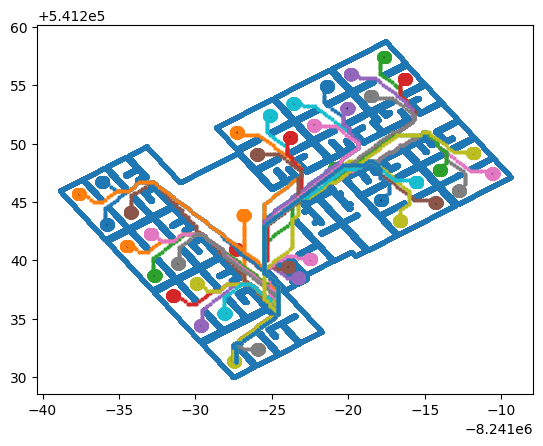

In [201]:
plt.scatter(ox,oy,marker='.',linewidths=0.005)

for space in m.walk:
    s=space.geometry.centroid
    s_near=s.buffer(0.2)
    plt.scatter(*s_near.exterior.xy,marker='o',linewidths=0.05)
    plt.scatter([s.x],[s.y],marker='.',color='black',s=1)


for space in m.walk:
    found=False
    for path_bounds, path in cache_paths.items():
        if m.compare_path_bounds(path_bounds, space.geometry.centroid, m.walk[7].geometry.centroid):
            plt.scatter([x for x,_ in path],[y for _,y in path],marker='.',linewidths=0.05)
            found=True
    
    if not found: print('missing path from %s to %s'%('nurse_station',str(space.unique_id)))

In [ ]:
from model.d_star_lite import DStarLite, Node
from model.utils import pixelate_floorplan

dstarlite = DStarLite(floor, zoom_factor=0.1)

# 1. visuals

In [32]:
import geopandas as gpd
import pandas as pd
file_name=lambda file: '../data/floorplans/unisabana_hospital_%s.geojson'%file
df=pd.concat([gpd.read_file(file_name('floor')),gpd.read_file(file_name('polygons'))])#.set_crs('epsg:3857', allow_override=True)#.to_crs('epsg:3857')

In [33]:
df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [25]:
df.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

<Figure size 640x480 with 0 Axes>

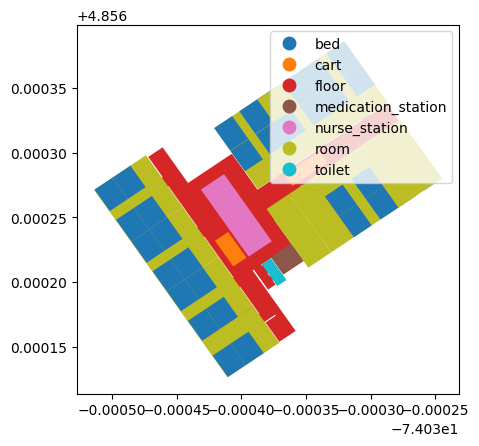

In [27]:
import matplotlib.pyplot as plt
fig=plt.figure()
df.plot(column="atype",legend=True)


# 2. cache paths

In [392]:
import pickle
with open("../data/paths/cache_paths.pkl", "rb") as cache_file:
    cache_paths = pickle.load(cache_file)

In [67]:
from shapely.geometry import Point
from math import sqrt

i=0
for direction, path in cache_paths.items():
    print(direction)
    setp0=path[0]
    for step in path[1:]:
        step1=step
        print(step0,step1,sqrt(sum((step0-step1)**2)))
        step0=step
    break

(<POINT (-8241026.851 541243.876)>, <POINT (-8241031.455 541236.979)>)
[-8241031.44441833   541237.03531115] [-8241026.80678852   541243.72127322] 8.136934252813173
[-8241026.80678852   541243.72127322] [-8241026.80678852   541243.53555205] 0.18572116864379495
[-8241026.80678852   541243.53555205] [-8241026.80678852   541243.34983088] 0.18572116864379495
[-8241026.80678852   541243.34983088] [-8241026.80678852   541243.16410971] 0.18572116852737963
[-8241026.80678852   541243.16410971] [-8241026.80678852   541242.97838854] 0.18572116864379495
[-8241026.80678852   541242.97838854] [-8241026.80678852   541242.79266737] 0.18572116864379495
[-8241026.80678852   541242.79266737] [-8241026.80678852   541242.60694621] 0.18572116864379495
[-8241026.80678852   541242.60694621] [-8241026.80678852   541242.42122504] 0.18572116864379495
[-8241026.80678852   541242.42122504] [-8241026.80678852   541242.23550387] 0.18572116852737963
[-8241026.80678852   541242.23550387] [-8241026.80678852   541242.0

[1, 2, 3]

0 [-8241026.80678852   541243.90699439] [-8241026.80678852   541243.72127322] 0.18572116864379495
1 [-8241026.80678852   541243.72127322] [-8241026.80678852   541243.53555205] 0.18572116864379495
2 [-8241026.80678852   541243.53555205] [-8241026.80678852   541243.34983088] 0.18572116864379495
3 [-8241026.80678852   541243.34983088] [-8241026.80678852   541243.16410971] 0.18572116852737963
4 [-8241026.80678852   541243.16410971] [-8241026.80678852   541242.97838854] 0.18572116864379495
5 [-8241026.80678852   541242.97838854] [-8241026.80678852   541242.79266737] 0.18572116864379495
6 [-8241026.80678852   541242.79266737] [-8241026.80678852   541242.60694621] 0.18572116864379495
7 [-8241026.80678852   541242.60694621] [-8241026.80678852   541242.42122504] 0.18572116864379495
8 [-8241026.80678852   541242.42122504] [-8241026.80678852   541242.23550387] 0.18572116852737963
9 [-8241026.80678852   541242.23550387] [-8241026.80678852   541242.0497827 ] 0.18572116864379495
10 [-8241026.8067885

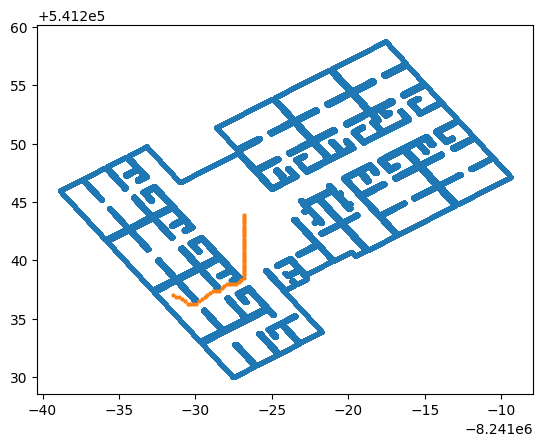

In [83]:
import numpy as np
ox,oy=np.array(floor.geometry.boundary.segmentize(max_segment_length=0.001).coords.xy)
plt.scatter(ox,oy,marker='.',linewidths=0.005)

for (s,g), path in cache_paths.items():
    step0=path[0]
    i=0
    for step in path[1:]:
        step1=step
        print(i,step0,step1,sqrt(sum((step0-step1)**2)))
        i+=1
        step0=step
    
    plt.scatter([x for x,_ in path],[y for _,y in path],marker='.',linewidths=0.05)
    break

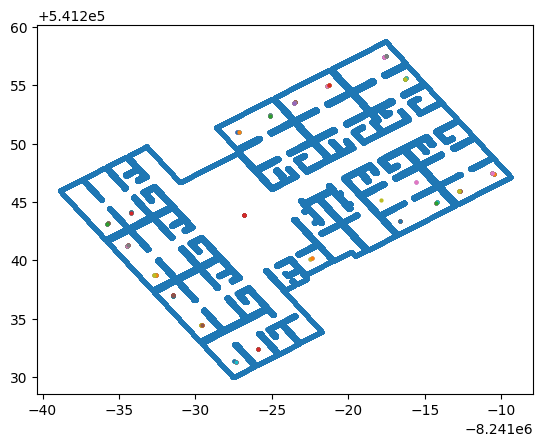

In [91]:
import numpy as np
ox,oy=np.array(floor.geometry.boundary.segmentize(max_segment_length=0.001).coords.xy)
plt.scatter(ox,oy,marker='.',linewidths=0.005)

for (s,g), path in cache_paths.items():
    plt.scatter([s.x],[s.y],marker='.',linewidths=0.05)

# 3. path finder

In [59]:
%load_ext autoreload
%autoreload 2
from model.d_star_lite import DStarLite, Node
from model.utils import pixelate_floorplan

dstarlite = DStarLite(floor, zoom_factor=0.1)

c:\Users\anita\.conda\envs\ia_env\lib\site-packages\mesa_geo\geospace.py:138: UserWarning: Converting State from crs EPSG:4326 to the crs of GeoSpace - EPSG:3857. Please check your crs settings if this is unintended, or set `GeoSpace.warn_crs_conversion` to `False` to suppress this warning message.
  warnings.warn(
c:\Users\anita\.conda\envs\ia_env\lib\site-packages\mesa_geo\geospace.py:138: UserWarning: Converting State from crs EPSG:4326 to the crs of GeoSpace - EPSG:3857. Please check your crs settings if this is unintended, or set `GeoSpace.warn_crs_conversion` to `False` to suppress this warning message.
  warnings.warn(


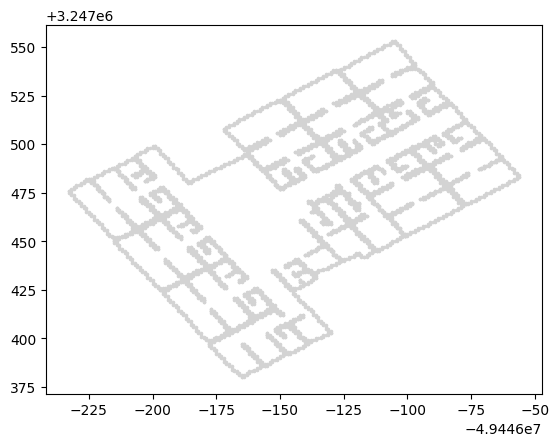

In [62]:
dstarlite = DStarLite(floor, zoom_factor=0.1)

plt.scatter(dstarlite.floor_PxlObject.ox, dstarlite.floor_PxlObject.oy, marker='.',s=10,color='lightgray')
plt.show()

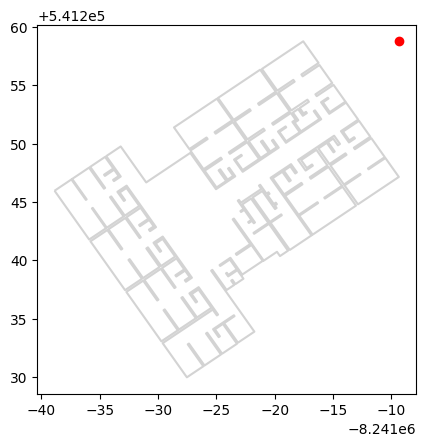

In [72]:
p = gpd.GeoSeries([floor.geometry.boundary])
p.plot(marker='x',color=['lightgray'])
plt.scatter(floor.geometry.convex_hull.bounds[2],floor.geometry.convex_hull.bounds[3],color='red')


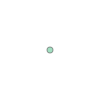

In [78]:
source.intersection(source.buffer(0.1))

In [31]:
len(dstarlite.obstacles_xy)

4242

In [8]:
import pandas as pd
import random

n_agents=10
atype=['patient']*n_agents
location=random.sample(m.space.agents, n_agents)
state=['active']*n_agents
stop_active_at= [random.triangular(3,6) for _ in range(n_agents)]
df=pd.DataFrame(zip(atype,location,state,stop_active_at), columns=['atype','location_agent','state','stop_active_at'])
df

,atype,location_agent,state,stop_active_at
0,patient,<__main__.State object at 0x0000026AEEE23C10>,active,4.082314
1,patient,<__main__.State object at 0x0000026AEED3BB50>,active,5.065231
2,patient,<__main__.State object at 0x0000026AEEE23CD0>,active,4.524165
3,patient,<__main__.State object at 0x0000026AEEA476D0>,active,3.777895
4,patient,<__main__.State object at 0x0000026AEEE23EE0>,active,4.401612
5,patient,<__main__.State object at 0x0000026AEED3B5E0>,active,4.400121
6,patient,<__main__.State object at 0x0000026AEEE236A0>,active,4.478237
7,patient,<__main__.State object at 0x0000026AEED3B040>,active,4.391256
8,patient,<__main__.State object at 0x0000026AC8F2AAF0>,active,4.557427
9,patient,<__main__.State object at 0x0000026AC8F2A160>,active,3.968548


In [360]:
a='este %s'
a%'l'

'este l'

In [353]:
gdf = gpd.GeoDataFrame(df, geometry=[x.geometry.centroid for x in df.location_agent], crs="EPSG:4326")
gdf

,atype,location_agent,state,stop_active_at,geometry
0,patient,<__main__.State object at 0x000001A9B07BE910>,active,5.725471,POINT (-8241109.62865 541223.76118)
1,patient,<__main__.State object at 0x000001A9B07BEA30>,active,4.287100,POINT (-8241032.88492 541245.92794)
2,patient,<__main__.State object at 0x000001A9B07BE5B0>,active,4.877415,POINT (-8241112.25864 541229.32269)
3,patient,<__main__.State object at 0x000001A9B07BE3D0>,active,5.108705,POINT (-8240993.59657 541243.39904)
4,patient,<__main__.State object at 0x000001A9B07BE3A0>,active,3.680226,POINT (-8241016.14547 541229.17731)
5,patient,<__main__.State object at 0x000001A9B07BE7F0>,active,4.844420,POINT (-8241114.71522 541213.47577)
6,patient,<__main__.State object at 0x000001A9B07BE580>,active,3.494405,POINT (-8241030.13027 541265.89469)
7,patient,<__main__.State object at 0x000001A9B07BE310>,active,4.264685,POINT (-8241062.50946 541254.55186)
8,patient,<__main__.State object at 0x000001A9B07BE370>,active,4.840389,POINT (-8241027.88079 541276.39239)
9,patient,<__main__.State object at 0x000001A9B07BEAC0>,active,4.412573,POINT (-8241058.02917 541206.26390)


In [328]:
m.space.agents

In [311]:
found_path, stepByStep_Path = dstarlite.main(source, target)

Initializing
calculating path
Path found


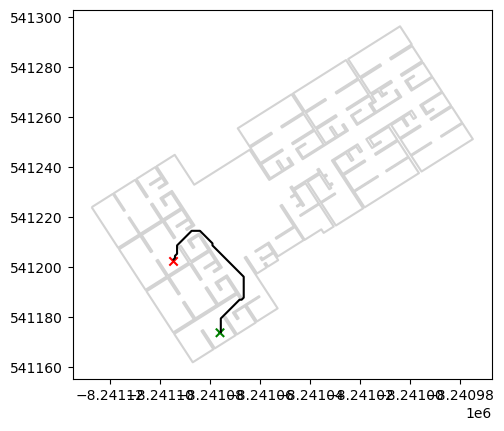

In [320]:
import matplotlib.pyplot as plt
from shapely.geometry import LineString

path=LineString(stepByStep_Path)
p = gpd.GeoSeries([floor.geometry.boundary, path, source, target])
p.plot(marker='x',color=['lightgray','k','g','r'])
plt.show()

In [322]:
import pickle
cache_paths[(source,target)] = stepByStep_Path; cache_paths[(target,source)]=stepByStep_Path[::-1]
with open("../data/paths/cache_paths.pkl", "wb") as cache_file:
    pickle.dump(cache_paths,cache_file)

In [248]:
file_name='../data/floorplans/unisabana_hospital_polygons.geojson'
df=gpd.read_file(file_name)
df

,atype,number,geometry
0,room,204,"POLYGON ((-74.03102 4.85562, -74.03095 4.85551..."
1,nurse_station,0,"POLYGON ((-74.03089 4.85614, -74.03076 4.85594..."
2,cart,1,"POLYGON ((-74.03055 4.85624, -74.03053 4.85620..."
3,cart,0,"POLYGON ((-74.03088 4.85597, -74.03083 4.85589..."
4,toilet,1,"POLYGON ((-74.03069 4.85589, -74.03067 4.85585..."
5,toilet,0,"POLYGON ((-74.03072 4.85592, -74.03069 4.85589..."
6,medication_station,0,"POLYGON ((-74.03067 4.85595, -74.03064 4.85590..."
7,room,201,"POLYGON ((-74.03132 4.85608, -74.03121 4.85592..."
8,room,202,"POLYGON ((-74.03121 4.85592, -74.03112 4.85577..."
9,room,203,"POLYGON ((-74.03112 4.85577, -74.03102 4.85562..."


In [249]:
m.space.get_agents_as_GeoDataFrame()

,geometry,atype,number
unique_id,,,
0,"POLYGON ((-8241095.378 541173.558, -8241087.45...",room,204
1,"POLYGON ((-8241081.253 541231.221, -8241066.59...",nurse_station,0
2,"POLYGON ((-8241042.965 541242.215, -8241040.52...",cart,1
3,"POLYGON ((-8241079.923 541212.615, -8241074.31...",cart,0
4,"POLYGON ((-8241059.222 541203.081, -8241056.77...",toilet,1
5,"POLYGON ((-8241061.533 541206.628, -8241059.15...",toilet,0
6,"POLYGON ((-8241056.899 541209.979, -8241053.13...",medication_station,0
7,"POLYGON ((-8241128.394 541224.222, -8241117.03...",room,201
8,"POLYGON ((-8241117.036 541206.793, -8241106.20...",room,202


In [14]:
m

NameError: name 'm' is not defined

In [53]:
def get_relation_to_AgentCentroid(space, agent, relation, agent_type):
    """Return a list of related agents.

    Args:
        agent: the agent for which to compute the relation
        relation: must be one of 'intersects', 'within', 'contains',
            'touches'
        other_agents: A list of agents to compare against.
            Omit to compare against all other agents of the layer.
    """

    possible_agents = space._agent_layer._get_rtree_intersections(agent.geometry)
    for other_agent in possible_agents:
        if (
            getattr(agent.geometry.centroid, relation)(other_agent.geometry)
            and other_agent.unique_id != agent.unique_id
            and other_agent.atype == agent_type
        ):
            yield other_agent # this is a generator of all matches
            #return other_agent # return first match
    # if no match was found
    return None

In [31]:
bed=source

In [54]:
for x in m.space._agent_layer._get_rtree_intersections(bed.geometry):
    if (getattr(bed.geometry.centroid, 'within')(x.geometry)):
        print(x.atype)

bed
room
floor


In [55]:
for x in get_relation_to_AgentCentroid(m.space, bed, 'within','room'):
    print(x.atype)

room
